<a id='top'></a>

# Homework 2: Introduction to Probability and Simulation
***

**Name**: 

***

This assignment is due on Canvas by **MIDNIGHT on Friday September 27**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5) 

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

***
<a/ id='p1'></a>
[Back to top](#top)

### [20 points] Problem 1

To play a game, you have a bag containing 30 fair six-sided dice, with faces `{1,2,3,4,5,6}`.  <img style="float: right; width: 200px; padding: 3mm;" src="https://images-na.ssl-images-amazon.com/images/I/619NZnvxJaL._SX425_.jpg" alt="Drawing"/>
This bag also contains 17 fair eight-sided dice (faces `{1,2,3,4,5,6,7,8}`) and 3 fair twenty-sided dice (faces `{1,2,3,4,...,19,20}`).  Call these 3 classes of die "Six", "Eight" and "Twenty" (or S, E, and T, for short). In order to be sure that you are not distinguishing dice by their feel, you are required to wear crab claw gloves. After donning your gloves, you grab one die at random from the bag. 

Work the following problems by hand (or claw) unless otherwise stated (but don't be afraid to simulate to check your result!). 

**Part A**: You roll your die one time.  What is the probability of the event $R_7$, that you roll a 7?  Include at least 4 decimal places in your answer.

$$
P(R_7) = P(R_7|S)P(S) + P(R_7|E)P(E) + P(R_7|T)P(T)
\tag{Law of Total Probability}
$$
$$
P(R_7) = 0 + \frac{1}{8}\frac{17}{50} + \frac{1}{20}\frac{3}{50} = 0.0455
\tag{Putting in the values}
$$

**Part B**: Suppose you roll a 7.  What is the probability that the die you chose from the bag is an Eight-sided die? 

$$
P(E|R_7)=\frac{P(R_7|E)P(E)}{P(R_7)}
\tag{Bayes' Theoerem}
$$
$$
\frac{\frac{1}{8}\frac{17}{50}}{0.0455} = 0.9341
\tag{Plugging in values}
$$

**Part C:**  Are the events $R_7$ and $E$ independent?  Justify your answer **using math**.

$$
P(R_7|E) ?= P(R_7)
\tag{They are independent if this is true}
$$
$$
\frac{1}{8} = .125 \ne 0.0455
\tag{plugging in values}
$$
Therefore they are not independent

**Part D:**  Suppose you roll your die $n$ times and record each outcome.  Obviously, if you roll 7 or 8 you know you did *not* pick a Six-sided die, and if you roll a 9 or higher, you must have picked a Twenty-sided die.

But, if you roll $n$ times in a row and get only 1, 2, 3, 4, 5, or 6 you would have a stronger belief that you in fact grabbed one of the Six-sided dice.  Let $L_n$ be the event that you roll $n$ rolls of 1, 2, 3, 4, 5, or 6 in a row.  For example, one outcome in $L_3$ is the sequence 2, 3, 1.

Given that you roll a single value of 1, 2, 3, 4, 5, or 6, what is the probability that you have grabbed a Six-sided die?  That is, calculate **by hand** $P(S \mid L_1)$.

$$
P(S|L_1) = \frac{P(L_1|S)P(S)}{P(L_1)}
\tag{Bayes' Theoerem}
$$
$$
P(L_1) = P(L_1|S)P(S) + P(L_1|E)P(E) + P(L_1|T)P(T)
\tag{Solving for the bottom first using Law of Total Probability}
$$
$$
P(L_1) = \frac{6}{6}\frac{30}{50} + \frac{6}{8}\frac{17}{50} + \frac{6}{20}\frac{3}{50} = 0.873
\tag{solving for P(L_1)}
$$
$$
P(S|L_1) = \frac{\frac{6}{6}\frac{30}{50}}{0.873} = 0.6873
\tag{plugging in numbers for final answer}
$$

**Part E**:  

First, work out **by hand** a formula for the probability in general that you are rolling a Six-sided die, given that you have rolled $n$ values in a row that are 1, 2, 3, 4, 5 or 6 (that is, $L_n$).  So you want a formula for $P(S \mid L_n)$ in terms of $n$.

Then, define a function `prob_six` to calculate $P(S \mid L_n)$.  This function should only take one positive integer argument, $n$.

Verify that your function is performing as expected by checking your answer to **Part D**.

$$
P(S|L_n) = \frac{P(L_n|S)P(S)}{P(L_n)}
\tag{Using Bayes' theorem yet again bc it's so nice}
$$
$$
P(L_n) = P(L_n|S)P(S) + P(L_n|E)P(E) + P(L_n|T)P(T)
\tag{Solving for L_n using Law of Total Probability}
$$
$$
= 1\frac{30}{50} + (\frac{6}{8})^n\frac{17}{50} + (\frac{6}{20})^n\frac{3}{50}
$$
$$
P(S|L_n) = \frac{\frac{30}{50}}{\frac{30}{50} + (\frac{6}{8})^n\frac{17}{50} + (\frac{6}{20})^n\frac{3}{50}}
\tag{Plugging this back into the original equation}
$$
$$
P(S|L_n) = \frac{30}{30 + 17(\frac{6}{8})^n+3(\frac{6}{20})^n}
\tag{simplifying slightly we have the final equation}
$$

In [2]:
def prob_six(n): #This will create the function found by hand above
    #first it will solve for the bottom
    prob = 0
    first = 6/8
    first = first**n
    first *= 17
    second = 6/20
    second = second**n
    second *= 3
    prob = 30 + first + second
    #then put that in the denominator and 30 in numerator for final result
    prob = 30/prob
    print("Probability it is a 6 sided die given",n,"rolls is",prob)
    return prob

#testing the function for some random values
prob_six(1)
prob_six(5)
prob_six(10)
prob_six(1000)
prob_six(10000000000)

Probability it is a 6 sided die given 1 rolls is 0.6872852233676976
Probability it is a 6 sided die given 5 rolls is 0.8812780492557869
Probability it is a 6 sided die given 10 rolls is 0.9690752747517922
Probability it is a 6 sided die given 1000 rolls is 1.0
Probability it is a 6 sided die given 10000000000 rolls is 1.0


1.0

This python code makes the function above and tests it for a value of 1. The result is the same as what we got in D therefore it functions with respect to D properly. Also tested with a really high value to make sure it doesn't exceed 1, it just rounds sadly, and some other random values out of curiosity and to see if the function makes sense as n increases.

**Part F:**  What is the smallest value of $n$ successive rolls of 1, 2, 3, 4, 5 or 6 that would make you believe that there's a better-than-95% chance that the die you grabbed is Six-sided?  Plugging larger and larger values for $n$ into your `prob_six` function is a very reasonable way to check this.

In [3]:
i = 0
while prob_six(i) < .95:
    i += 1

Probability it is a 6 sided die given 0 rolls is 0.6
Probability it is a 6 sided die given 1 rolls is 0.6872852233676976
Probability it is a 6 sided die given 2 rolls is 0.7531538316701185
Probability it is a 6 sided die given 3 rolls is 0.805306972951752
Probability it is a 6 sided die given 4 rolls is 0.8473808781090273
Probability it is a 6 sided die given 5 rolls is 0.8812780492557869
Probability it is a 6 sided die given 6 rolls is 0.9083251148952147
Probability it is a 6 sided die given 7 rolls is 0.929659421687253
Probability it is a 6 sided die given 8 rolls is 0.9463090613586362
Probability it is a 6 sided die given 9 rolls is 0.9591866491403235


The answer is 9 rolls found by the above code which just plugs in values until prob_six returns something greater than 95.

***
<a id='p2'></a>
[Back to top](#top)


### [20 points] Problem 2

Oscar and Stella are two octopuses who are very excited to have both secured professorships in the Computer Science department at CU. They work hard, but they also like to blow off a little steam after work. When they leave work from the CU Engineering Center ($E~$), they each head for one of five other locations: the Gym to get strong ($G~$), the Library to get learned ($L~$), the Boulder Reservoir to have a nice swim ($R$), the Hill to have a sandwich ($H~$), or to Brewing Market to have a nice Coffee ($C~$).  

Here are some rules governing their movements throughout the fair city of Boulder:
* When Oscar and/or Stella is leaving one location, they randomly select one of the available adjacent locations, with equal probability.
* This includes back-tracking. Eg. Stella could go from the Engineering Center to the Library, then directly back to the Engineering Center. 
* Assume that all moves require the same amount of time.
* They are also not allowed to stay put; they always must move to some *other* adjacent location.
* Oscar and Stella, being the think-for-yourselfers that they are, also act **independently** of one another. That is, the probability that Oscar goes from one place to another is independent of the probability of Stella's movements.

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/chris_and_dan_statespace.png" style="width: 300px;"/>

**Part A**: Oscar is exhausted from a long day of researching whether [P=NP](https://en.wikipedia.org/wiki/P_versus_NP_problem) so, naturally, he wants to go to the brewing market to grab a coffee. That being said, Osacar has made a break through in his research and wants to follow up on it at the library, but he needs to run some errands too. Assume Oscar can do his errands at any location on the map. 

Compute by hand the probability that Oscar goes to the Brewing Market ($C$) in his first stop, makes a second stop at any location, then goes to the Library ($L$) third. 

The probability that the 3rd stop is L and the second stop can go to L and the first stop is C is P(C $\cap$ E $\cap$ L) + P(C $\cap$ H $\cap$ L) since only 2 paths to L. This equals P(L | C $\cap$ E) $\cdot$ P(C $\cap$ E) + P(L | C $\cap$ H) $\cdot$ P(C $\cap$ H) = P(L | C $\cap$ E) $\cdot$ P(E | C) $\cdot$ P(C) + P(L | C $\cap$ H) $\cdot$ P(H | C) $\cdot$ P(C) by conditional probability. By counting what paths Oscar could have taken from each point this is $\frac{1}{4}\cdot\frac{1}{3}\cdot\frac{1}{4} + \frac{1}{3}\cdot\frac{1}{3}\cdot\frac{1}{4} = \frac{1}{48} + \frac{1}{36} = 0.04861$

**Part B**: Stella is a competitive body-building octopus professor. This is quite the feat given her lack of bones!  Compute (by hand) the probability that Stella ends up at the Gym _either_ as her first _or_ second location visited after leaving the Engineering Center ($E$). (Again, assume that Stella wanders the streets of Boulder randomly using the same rules described above.)

The probability her first stop is the gym or her second stop is the gym is P(G) + P(G | R) $\cdot$ P(R) + P(G | L) $\cdot$ P(L) since those are the ways she could get there in one or two stops. This is $\frac{1}{4} + \frac{1}{2}\cdot\frac{1}{4}+\frac{1}{4}\cdot\frac{1}{4} = \frac{1}{4} + \frac{1}{8} + \frac{1}{16} = \frac{7}{16} = 0.4375$

**Part C**: Suppose that Stella works late at the Engineering Center, while Oscar goes to the Gym.  Later, they both leave and wander around, randomly and independently of one another, as described above.
1. What is the probability that they run into each other in the same location on the first location visited?  
2. Given their two initial locations, what is the probability that they meet at the Hill after 2 moves?

1. The probability they meet at the first stop is $P(L_O\cap L_S) + P(R_O \cap R_S) = P(L_O)P(L_S) + P(R_O)P(R_S) = \frac{1}{4}\frac{1}{4} + \frac{1}{4}\frac{1}{4} = \frac{1}{8} = 0.125$ since that is where they can meet up after the first stop. <br>
2. The probability they meet at the hill after two moves is going to be the probability Oscar goes to L and then H and Stella goes to L then H or C then H or G then H since those are the only ways they can get to the hill in two moves. This is $[P(H_O|L_O)\cdot P(L_O)][P(H_S|C_S)\cdot P(C_S)+P(H_S|L_S)\cdot P(L_S)+P(H_S|G_S)\cdot P(G_S)] = [\frac{1}{4}\cdot\frac{1}{4}][\frac{1}{3}\cdot\frac{1}{4}+\frac{1}{4}\cdot\frac{1}{4}+\frac{1}{4}\cdot\frac{1}{4}] = (\frac{1}{16})(\frac{1}{12}+\frac{1}{16}+\frac{1}{16})=0.01302$

**Part D**: Write a simulation to confirm that your by-hand calculations in **Part A**, **Part B**, and **Part C** are correct. Make sure you run your simulations for enough trials that your estimates are reasonably close to your analytic results. In addition to showing your code, you should explain in Markdown (not just in code comments) what your code is doing and why it is a reasonable approximation of the probabilities in **Part A**, **Part B**, and **Part C**.  

In [4]:
# Part A
#First we are making a graph that represents the locations
locations = {
    "R" : ["E", "G"],
    "G" : ["R", "E", "L", "H"],
    "H" : ["G", "L", "C"],
    "L" : ["G", "H", "C", "E"],
    "E" : ["R", "G", "L", "C"],
    "C" : ["H", "L", "E"]
}
#making a function that sends Oscar along a random journey
#then if he made the first stop C and third L return 1, else 0
def partA():
    #this chooses and saves the first stop
    first = np.random.choice(locations["E"])
    #this chooses the second from the first and saves it
    second = np.random.choice(locations[first])
    #this chooses the third stop and saves it based on second
    third = np.random.choice(locations[second])
    #this makes it return a 1 if it stopped on C first and L third
    if first == "C" and third == "L":
        return 1
    #else it returns 0
    return 0

#this will sum up the runs
#if it returns true then he did it right and will add it to the sum
#in the end it will divide by the total
n = 10
total = 0
for i in range(n):
    total += partA()
probability = total/n
print("With", n, "runs the probability = ", probability)
n = 100
total = 0
for i in range(n):
    total += partA()
probability = total/n
print("With", n, "runs the probability = ", probability)
n = 1000
total = 0
for i in range(n):
    total += partA()
probability = total/n
print("With", n, "runs the probability = ", probability)
n = 100000
total = 0
for i in range(n):
    total += partA()
probability = total/n
print("With", n, "runs the probability = ", probability)
n = 1000000
total = 0
for i in range(n):
    total += partA()
probability = total/n
print("With", n, "runs the probability = ", probability)

With 10 runs the probability =  0.1
With 100 runs the probability =  0.04
With 1000 runs the probability =  0.043
With 100000 runs the probability =  0.04909
With 1000000 runs the probability =  0.048621


My code first creates a graph representing where Oscar can go. There is then a function that moves Oscar two spaces. If the first spot he moved to was C, and the third was L, then it returns a 1, else a 0. A for loop calls the move function n times, summing up the result each time. It then divides this by how many times it ran. This means it tells you out of n times how many times did he actually make it which makes is a reasonable aproximation for how often he makes it. 

In [5]:
# Part B
#First we are making a graph that represents the locations
locations = {
    "R" : ["E", "G"],
    "G" : ["R", "E", "L", "H"],
    "H" : ["G", "L", "C"],
    "L" : ["G", "H", "C", "E"],
    "E" : ["R", "G", "L", "C"],
    "C" : ["H", "L", "E"]
}

#the function that will take Stella on her journey
def partB():
    #I'm not gonna comment since I'm explaining in the markdown
    first = np.random.choice(locations["E"])
    if first == "G":
        return 1
    second = np.random.choice(locations[first])
    if second == "G":
        return 1
    return 0
    
#this will sum up the runs
#if it returns true then he did it right and will add it to the sum
#in the end it will divide by the total
n = 10
total = 0
for i in range(n):
    total += partB()
probability = total/n
print("With", n, "runs the probability = ", probability)
n = 100
total = 0
for i in range(n):
    total += partB()
probability = total/n
print("With", n, "runs the probability = ", probability)
n = 1000
total = 0
for i in range(n):
    total += partB()
probability = total/n
print("With", n, "runs the probability = ", probability)
n = 100000
total = 0
for i in range(n):
    total += partB()
probability = total/n
print("With", n, "runs the probability = ", probability)
n = 1000000
total = 0
for i in range(n):
    total += partB()
probability = total/n
print("With", n, "runs the probability = ", probability)

With 10 runs the probability =  0.8
With 100 runs the probability =  0.39
With 1000 runs the probability =  0.408
With 100000 runs the probability =  0.43895
With 1000000 runs the probability =  0.437382


First I created the graph of the locations. Then Stella goes one spot from E. If she is at G then the program returns a 1. If not then it sends her one more random step and then if she is on G it returns 1, else 0. A for loop runs this function n times, and sums up the results. This therefore takes the number of successes and divides it by the total number of trials getting an accurate measure of the probability Stella goes to G on her first try or second.

In [6]:
# Part C
#First we are making a graph that represents the locations
locations = {
    "R" : ["E", "G"],
    "G" : ["R", "E", "L", "H"],
    "H" : ["G", "L", "C"],
    "L" : ["G", "H", "C", "E"],
    "E" : ["R", "G", "L", "C"],
    "C" : ["H", "L", "E"]
}

#the function that takes Stella and Oscar on a journey
def partC():
    #I'm not gonna comment since I'm explaining in the markdown
    firstO = np.random.choice(locations["G"])
    secondO = np.random.choice(locations[firstO])
    
    firstS = np.random.choice(locations["E"])
    secondS = np.random.choice(locations[firstS])
    
    if secondO == "H" and secondS == "H":
        return 1
    return 0
    
#this will sum up the runs
#if it returns true then they did it right and will add it to the sum
#in the end it will divide by the total
n = 10
total = 0
for i in range(n):
    total += partC()
probability = total/n
print("With", n, "runs the probability = ", probability)
n = 100
total = 0
for i in range(n):
    total += partC()
probability = total/n
print("With", n, "runs the probability = ", probability)
n = 1000
total = 0
for i in range(n):
    total += partC()
probability = total/n
print("With", n, "runs the probability = ", probability)
n = 100000
total = 0
for i in range(n):
    total += partC()
probability = total/n
print("With", n, "runs the probability = ", probability)
n = 1000000
total = 0
for i in range(n):
    total += partC()
probability = total/n
print("With", n, "runs the probability = ", probability)

With 10 runs the probability =  0.0
With 100 runs the probability =  0.02
With 1000 runs the probability =  0.008
With 100000 runs the probability =  0.01307
With 1000000 runs the probability =  0.012928


This function sends Stella and Oscar, starting from E and G respectively, two stops. Then if they are both at H it returns a 1. A for loop then calls this function n times and sums up how many successes there were. The successes are divided by the number of trials, therefore giving an accurate rate at which they both end up at H after two stops. 

***
<a/ id='p3'></a>
[Back to top](#top)

### [20 points] Problem 3  

As part of their Computer Science Jedi training, Zach and Rachel are having a lightsaber duel. The rules of the lightsaber duel are as follows:
* The duel is composed of a number of rounds.
* Each round consists of Zach practicing his sweetest Jedi moves and trying to strike Rachel, then Rachel practicing *her* best moves and trying to strike Zach.
* If Zach manages to strike Rachel, then Zach is awarded a point, and similarly if Rachel manages to strike Zach, then Rachel is awarded a point.
* If a round ends in a tie, then Zach and Rachel proceed to another round. If a round ends with one Jedi scoring a point but the other one does not, then the Jedi who scored a point wins the duel.

Let $Z$ be the event that "Zach wins the duel", $E$ be the event that "the duel ends after the first round of lightsaber strikes", and $C$ be the event that "the duel continues after the first round of lightsaber strikes".  Suppose that the result of one lightsaber strike is independent of the other strikes, Zach successfully lands his lightsaber strikes with probability $p$, and Rachel lands her strikes with probability $q$.

**Part A**: The duel will continue until Zach or Rachel wins.  What is the sample space $\Omega$ for this "experiment"?  Represent the outcomes of individual lightsaber strikes by $H$ for a hit and $M$ for a miss, and assume that Zach has the first strike in each round. At the very least, your answer should include all of the events in $\Omega$ that include one or two rounds.

$\Omega$ can be represented by {{MM},{HH},...,{MM},{HH},{MH},{HM}} which represents that they could tie for any number of rounds until the finally have {MH} or {HM} which means that one of them won and the duel is over.

**Part B**: Determine $P(Z \mid E)$ in terms of $p$ and $q$.

The probability of P(Z | E) is $\frac{(1-q)p}{(1-q)p + (1-p)q}$ which is found because it is the probability Zach wins over the probability that it ends in one round since that is all the ways it could end in one round.

**Part C**: Explain why events $C$ and $Z$ are independent. 

C and Z are indepedent because the fact that the last round tied doesn't effect the chances of Zach hitting Rachel or Rachel hitting Zach. Since C doesn't affect them hitting each other Z will also not be affected since it depends on Rachel and Zach hitting each other. 

**Part D**: Use the Law of Total Probability to show that $P(Z) = p(1-q) + (2pq - p - q +1) ~P(Z \mid C)$. 

$$
P(Z) = P(Z|E)P(E) + P(Z|C)P(C)
\tag{Law of Total Probability}
$$
From the last problem we have P(Z | E). P(E) is it ending in round which is the probability that Zach hits and Rachel misses or Rachel hits and Zach misses. P(C) is the probability there is a tie which is Zach hits and Rachel hits or Zach misses and Rachel misses.
$$
P(Z) = \frac{(1-q)p}{(1-q)p+(1-p)q}[(1-q)p+(1-p)q] + P(Z|C)(pq + (1-p)(1-q))
\tag{From above statement we now have this}
$$
$$
P(Z) = p(1-q)+(2pq-p-q+1)P(Z|C)
\tag{Through the power of basic algebra we have the solution}
$$

**Part E**: Use the fact from **Part C** that $P(Z \mid C) = P(Z)$ to determine $P(Z)$ in terms of $p$ and $q$.

P(Z) is the probability that Zach wins which is the probability that Zach hits and Rachel misses so
$$
P(Z) = p(1-q)+(2pq-p-q+1)P(Z)
$$
$$
P(Z) = p-pq+2pqP(Z)-pP(Z)-qP(Z)+P(Z)
\tag{Just a lot of basic algebra now}
$$
$$
-2pqP(Z)+pP(Z)+qP(Z)=p-pq
$$
$$
P(Z)(-2pq+p+q)=p-pq
$$
$$
P(Z)=\frac{p-pq}{-2pq+p+q}
\tag{We did it yay}
$$

**Part F**: Explain why the answers to **Part B** and **Part E** are the same. 

They are the same because apparently they are independent because math said so. This makes sense because each round is independent of each other. The rounds don't affect the probability that Zach hits Rachel and Rachel hits Zach so everytime they have the same odds of winning no matter what.
$$
P(Z)=\frac{p(1-q)}{-pq-pq+p+q}
$$
$$
P(Z)=\frac{p(1-q)}{(1-q)p+(1-p)q}
\tag{They are the same through the magic of math}
$$

**Part G**: Explain the significance of the solution technique for $P(Z)$ outlined in **Part D** and **Part E**.  Why did we go this route instead of computing $P(Z)$ directly?  Can we always use such techniques?  What assumption did we need to make in order to use this solution approach?

This uses the law of total probability to accurately get what the probability equals when they are dependent or independent. We couldn't go this route directly because P(Z) has a lot of ifs and included the probability over all the rounds since we weren't yet sure they were independent. You can always use such techniques, but we were only able to solve and complete it because we made the assumption that P(Z|C) is independent and therefore is equal to P(Z). Had we not made that assumption we would not have been able to solve the equation.

***
<a id='p4'></a>
[Back to top](#top)

### [25 points] Problem 4

In this problem you will write some code to simulate the game of **Miniopoly** (a very rough approximation of [Monopoly](https://en.wikipedia.org/wiki/Monopoly_(game)).  The game consists of a round board with 40 "squares" numbered from $0$ to $39$, where squares $0$ and would-be $40$ are [coincident](https://en.wikipedia.org/wiki/Coincident) and called **GO**.  A player starts on **GO** with \\$200 in their pocket.  On each turn the player rolls a pair of dice and then moves a number of spaces equal to the sum of the dice.  Landing on different squares have different results: 

- Squares 3, 7, 15, 22, 33, and 36 cause you to draw a card.  The cards tell you to collect either \\$50 or \\$250 or pay the bank \\$50.  There is always an equal probability associated with each of these possible cards.


- Squares 0, 10, and 20 do not trigger any action 


- Square 30 is **Go To Jail**, which sends the player directly to **Jail** and ends the turn 

- If a player starts a turn from **Jail** she rolls two dice: 

    - If the player rolls doubles (i.e. the dice have equal values) the player moves from Square 10 a number of squares equal to the sum of the dice
    
    - If the player rolls anything other than doubles she pays the bank \$20 and remains in **Jail** 
    

- If the player passes or lands on **GO** she collects \$200. 

- If the player lands on any other square not mentioned above, she pays the bank \$25. 


If at any point the player has \$0 or less they go bankrupt and the game ends.

See [here](http://www.cs.colorado.edu/~tonyewong/home/resources/miniopoly_example.png) for an example of the Miniopoly board layout.

<br>

**Part A**: Complete the function miniopoly_turn below. The function should simulate one turn of Miniopoly.  It should take as arguments the player's current location on the board as well as the player's current cash reserves, and return the player's new location and cash reserves after the turn has completed. Note that if a player goes bankrupt during the game you should return their cash as 0 instead of a negative value.  

In [7]:
def miniopoly_turn(state, cash):
    # Your code goes here.
    # rolls the dice and stores it for use
    roll1 = np.random.randint(1,7)
    roll2 = np.random.randint(1,7)
    roll = roll1 + roll2
    # now store the spaces that you draw on
    draws = [3, 7, 15, 22, 33, 36]
    draw = [50, 250, -50]
    # now draw one of them randomly
    drawed = np.random.choice(draw)
    # the spaces where you do nothing
    nothing = [0, 10, 20, 30]
    # if jail then do stuff accordingly
    if state == 30:
        if roll1 == roll2:
            state = 10 + roll
        else:
            cash -= 20
    # if not jail then add normally
    else:
        state += roll
    # if we passed go then do a thing
    if state > 39:
        state -= 40
        cash += 200
    # now that everything has been taken care of do turn stuff
    if state in draws:
        cash += drawed
    elif state not in nothing:
        cash -= 25
    # finally if their money is below 0 return 0 instead
    if cash < 0:
        cash = 0
    return state, cash

**Part B**: Use your function from **Part A** to Simulate at least 10000 25-turn games of Miniopoly and make a frequency histogram of the player's cash at the end of the game.

In [8]:
#Simulation for Part B
player_state = 0
player_cash = 200
turn_ends = []
for i in range(10000):
    player_cash = 200
    player_state = 0
    for j in range(25):
        player_state, player_cash = miniopoly_turn(player_state, player_cash)
        if player_cash == 0:
            break
    turn_ends.append(player_cash)

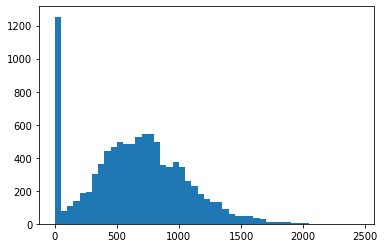

In [9]:
#Frequency histogram
bins = range(0,2500,50)
plt.hist(turn_ends, bins);

**Part C**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in a game that only lasts 25 turns.

In [10]:
#Estimation of probability of going bankrupt
prob = 0
for j in turn_ends:
    if j == 0:
        prob += 1
prob = prob/len(turn_ends)
print("The probability of them going bankrupt is: ", prob)

The probability of them going bankrupt is:  0.1206


**Part D**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in a 25 turn game  _given_ that they went to **Jail** at least twice.  Is a player more or less likely to go bankrupt if they've been to **Jail** twice?  

They are more likely to go bankrupt if they have been to jail at least twice. The probability was gotten by using conditional probability to say P(bankrupt|jail) = P(bankrupt and jail)/P(jail). P(bankrupt and jail) is how many people went bankrupt and went to jail divided by total people. P(jail) is how many times people went to jail twice or more divided by total games.

In [11]:
#Estimate probability of going bankrupt given jail at least twice.
#Simulation for Part B
player_state = 0
player_cash = 200
turn_ends = []
number_jails = 0
union_jails = 0
bankrupt = 0
for i in range(10000):
    player_cash = 200
    player_state = 0
    jailed = False
    jails = 0
    for j in range(25):
        player_state, player_cash = miniopoly_turn(player_state, player_cash)
        if player_state == 30 and jailed == False:
            jailed = True
            jails += 1
        if jailed == True and player_state != 30:
            jailed = False
        if player_cash == 0:
            break
    turn_ends.append(player_cash)
    if player_cash == 0 and jails >= 2:
        union_jails += 1
    if player_cash == 0:
        bankrupt += 1
    if jails >= 2:
        number_jails += 1
prob_top = union_jails/10000
prob_bot = number_jails/10000
prob = prob_top/prob_bot
print("Probability they went bankrupt given they went to jail twice = ", prob)

Probability they went bankrupt given they went to jail twice =  0.18929016189290163


**Part E**: Use your code from **Part A** to estimate the probability (either directly or using Bayes' Rule) that a player has gone to jail at least twice, given that the player went bankrupt in the first 25 turns.

In [12]:
#Estimate probability of going to jail twice, given bankruptcy in first 25 turns.
prob_bank = bankrupt/10000
new_prob = prob*prob_bot/prob_bank
print("The probability they went to jail given bankrupt = ", new_prob)

The probability they went to jail given bankrupt =  0.1334503950834065


Using Bayes' theorem P(jail|bankrupt) = P(bankrupt | jail)P(jail)/P(bankrupt). The numerator is taken from the same numbers gotten in part D for those probabilities. The denominator was gotten by taken the total number of people who went bankrupt divided by the total number of games. 

***
<a id='p5'></a>
[Back to top](#top)

### [15 points] Problem 5

To get published in an academic journal, you have to prove something "interesting."  As a result, most academics begin their research by investigating hypotheses that, all else equal, are unlikely to be true.  Suppose each research project begins with a research *claim* that has a 10% chance of being correct.

They then perform a study that satisfies the following two properties:

    1) The probability that they correctly *find* an important result given that their *claim* is true is 50%
    2) The probability that they incorrectly *find* an important result given that their *claim* is false is 5%

If they *find* an important result they are published.  What is the probability that their *claim* was true, given that they were published?

Result is represented by R, Claim is represented by C. The probility that their claim is correct is P(C) = .1. The probibility they find a result given claim is P(R|C) = .5. The probability they find a result given not claim is P(R|C$^C$) = .05. 
$$
P(C|R) = \frac{P(R|C)P(C)}{P(R)}
\tag{Bayes' Theoerem}
$$
$$
P(R) = P(R|C)P(C)+P(R|C^C)P(C^C)
\tag{solving for P(R) first using law of total probability}
$$
$$
P(C|R) = \frac{0.5\cdot 0.1}{0.5\cdot 0.1 + 0.05\cdot 0.9} = 0.5263
\tag{Now we just plug stuff in}
$$